In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Atsisiunciame duomenis ( pvz . NVDA ir BTC )
tickers = ["BNB-USD", "DOGE-USD"]
df = yf.download(tickers, start="2018-01-01")
returns = df["Close"].pct_change().dropna()


[*********************100%***********************]  2 of 2 completed


In [2]:
print(returns)
print()
print(returns.mean())

Ticker       BNB-USD  DOGE-USD
Date                          
2018-01-02  0.050289  0.026490
2018-01-03  0.078992  0.019136
2018-01-04 -0.033756  0.034764
2018-01-05  0.618973  0.261613
2018-01-06  0.525742  0.221583
...              ...       ...
2026-02-17 -0.014378 -0.003476
2026-02-18 -0.021112 -0.021047
2026-02-19  0.004361 -0.002264
2026-02-20  0.030476  0.018649
2026-02-21  0.006989 -0.000604

[2973 rows x 2 columns]

Ticker
BNB-USD     0.002607
DOGE-USD    0.003388
dtype: float64


In [4]:
print(df.isnull().sum())

Price   Ticker  
Close   BNB-USD     0
        DOGE-USD    0
High    BNB-USD     0
        DOGE-USD    0
Low     BNB-USD     0
        DOGE-USD    0
Open    BNB-USD     0
        DOGE-USD    0
Volume  BNB-USD     0
        DOGE-USD    0
dtype: int64


BNB-USD


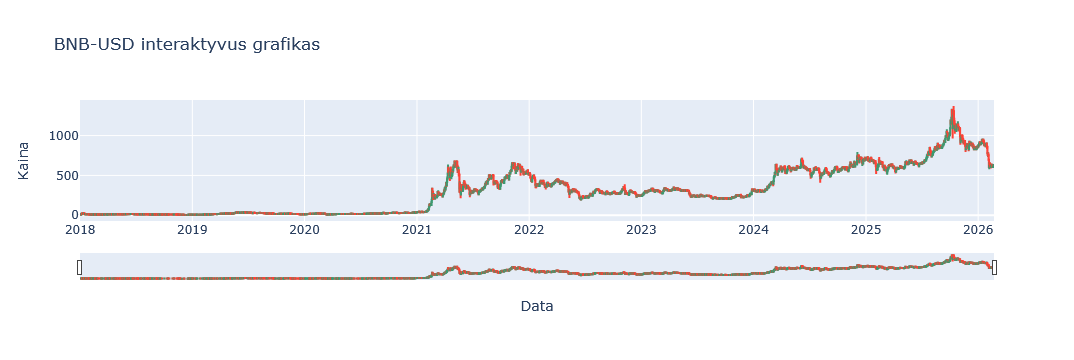

DOGE-USD


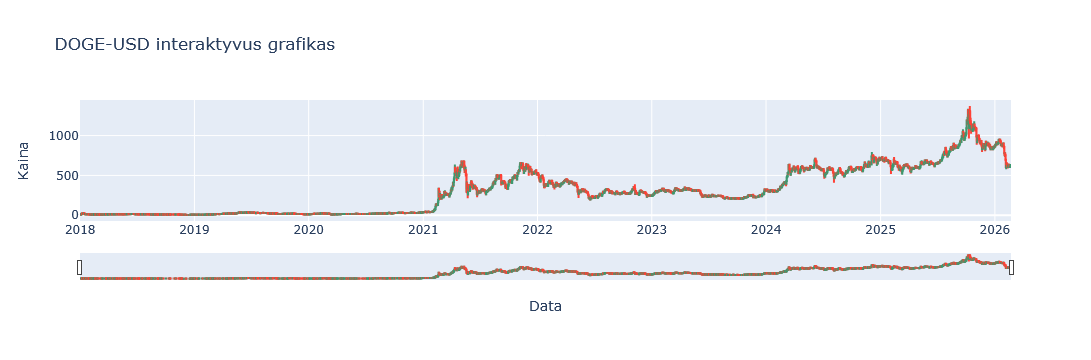

In [27]:
def analyze_asset(df):
    """
    Kainos grafiką su indikatoriumi. - Candlestick
    95% VaR reikšmę.
    Expected Shortfall
    Sharpe koeficientą.
    """

    for ticker in tickers:
        print(ticker)

        df_plot=df

        if isinstance(df_plot.columns, pd.MultiIndex):
            df_plot = df_plot.xs(ticker, axis=1, level=1)
        
        fig = go.Figure(
            data=[go.Candlestick(x=df_plot.index,
                                open=df_plot['Open'],
                                high=df_plot['High'],
                                low=df_plot['Low'],
                                close=df_plot['Close'],
                                name='Market Data')]
        )
        fig.update_layout(title=f'{ticker} interaktyvus grafikas',
                          yaxis_title='Kaina',
                          xaxis_title='Data')
        fig.show()
        

analyze_asset(df)